In [46]:
import os
os.chdir(r'C:\Users\guthu\Desktop\fake news')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv',index_col=0)

### Text Pre-proccessing

In [3]:
df = pd.DataFrame(data)

In [4]:
df = df.dropna()

<BarContainer object of 2 artists>

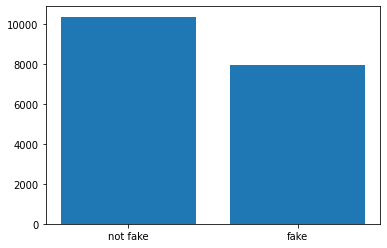

In [140]:
dic = {'not fake':len(df['label'][df['label']==0]),'fake':len(df['label'][df['label']==1])}
x = dic.keys()
y = dic.values()
plt.bar(x,y)

In [5]:
numbers = []
for i in range(len(df['title'])):
    numbers.append(i)

In [6]:
df['id'] = numbers
df.index = df['id']
df.drop(['id'],axis=1,inplace=True)

In [7]:
df

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
18280,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0


In [85]:
Combined_words = []
for i in range(len(df['title'])):
    c = ' '.join([df['title'][i],df['author'][i]])
    Combined_words.append(c)

In [86]:
len(Combined_words)

18285

In [87]:
import re
new_data = []
for sentence in Combined_words:
   new_text = re.sub('[^a-zA-Z]',' ',sentence)
   new_text = new_text.lower()
   new_data.append(new_text)

### Train Test split

In [88]:
labels = df['label']

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(new_data,labels,test_size=0.3,random_state=5)

### Tokenization

In [90]:
from tensorflow.keras.preprocessing.text import Tokenizer
T = Tokenizer(num_words=1000,oov_token='<UNK>')
T.fit_on_texts(X_train)

In [91]:
word_index = T.word_index  ### word to index dictionary

In [92]:
len(word_index)

18776

In [93]:
X_train = T.texts_to_sequences(X_train)

In [94]:
X_test = T.texts_to_sequences(X_test)

### Padding 

In [117]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len = 40
X_train = pad_sequences(X_train,maxlen=sentence_len,truncating='pre')
X_test = pad_sequences(X_test,maxlen=sentence_len,truncating='pre')

In [118]:
print(X_train.shape)
print(X_test.shape)
print(len(Y_train))
print(len(Y_test))

(12799, 40)
(5486, 40)
12799
5486


### Model building

#### Logistic regression 

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
L = LogisticRegression()
L.fit(X_train,Y_train)

C:\Users\guthu\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

In [122]:
predictions = L.predict(X_test)
accuracy = accuracy_score(predictions,Y_test)
print(accuracy)

0.6551221290557784


#### ANN

In [123]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout,Embedding

In [124]:
ANN = Sequential([
    Dense(32,activation='relu',input_shape = (X_train.shape[1],)),
    Dense(64,activation='relu',input_shape = (X_train.shape[1],)),
    Dense(128,activation='relu',input_shape = (X_train.shape[1],)),
    Dense(64,activation='relu',input_shape = (X_train.shape[1],)),
    Dense(32,activation='relu',input_shape = (X_train.shape[1],)),
    Dense(1,activation='sigmoid',input_shape =(X_train.shape[1],)),
])

In [125]:
ANN.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"]
             )

In [126]:
history = ANN.fit(X_train,Y_train,epochs=100,batch_size = 256,validation_data=(X_test,Y_test))

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 1.5441 - accuracy: 0.5730 - val_loss: 0.9088 - val_accuracy: 0.5946
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7793 - accuracy: 0.6203 - val_loss: 0.7748 - val_accuracy: 0.5964
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.6468 - val_loss: 0.7406 - val_accuracy: 0.6156
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6707 - val_loss: 0.7316 - val_accuracy: 0.6294
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.6922 - val_loss: 0.7329 - val_accuracy: 0.6128
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.6986 - val_loss: 0.7130 - val_accuracy: 0.6420
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5582 - accuracy: 0.7165 - val_loss: 0.6950 - val_accuracy: 0.6407
Epoch 8/100
5

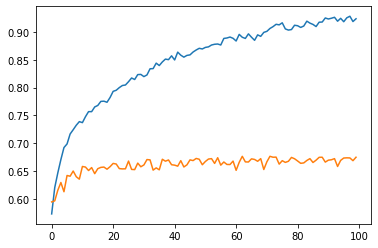

In [127]:
H = history.history
import matplotlib.pyplot as plt
plt.plot(H['accuracy'])
plt.plot(H['val_accuracy'])

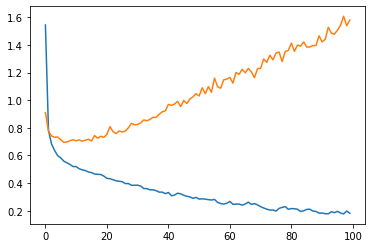

In [128]:

plt.plot(H['loss'])
plt.plot(H['val_loss'])

#### LSTM 

In [129]:
embedded_vector_features=40
model = Sequential()
model.add(tf.keras.layers.Embedding(1000, embedded_vector_features, input_length=X_train.shape[1]))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(300))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [130]:
model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [131]:
LSTM = model.fit(X_train,Y_train,epochs=20,batch_size = 512,validation_data=(X_test,Y_test))

Epoch 1/20
25/25 [==============================] - 25s 922ms/step - loss: 0.6428 - accuracy: 0.6086 - val_loss: 0.5752 - val_accuracy: 0.7716
Epoch 2/20
25/25 [==============================] - 23s 930ms/step - loss: 0.4409 - accuracy: 0.8304 - val_loss: 0.2851 - val_accuracy: 0.8881
Epoch 3/20
25/25 [==============================] - 23s 932ms/step - loss: 0.1768 - accuracy: 0.9358 - val_loss: 0.1173 - val_accuracy: 0.9559
Epoch 4/20
25/25 [==============================] - 23s 934ms/step - loss: 0.0937 - accuracy: 0.9727 - val_loss: 0.0773 - val_accuracy: 0.9752
Epoch 5/20
25/25 [==============================] - 23s 934ms/step - loss: 0.0606 - accuracy: 0.9819 - val_loss: 0.0686 - val_accuracy: 0.9779
Epoch 6/20
25/25 [==============================] - 23s 930ms/step - loss: 0.0515 - accuracy: 0.9848 - val_loss: 0.0626 - val_accuracy: 0.9799
Epoch 7/20
25/25 [==============================] - 23s 933ms/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.0586 - val_accuracy: 0.9814

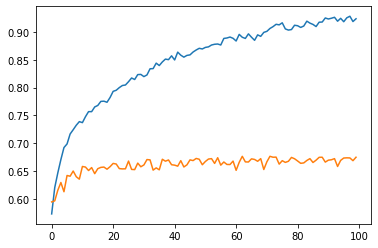

In [132]:
lstm = history.history
import matplotlib.pyplot as plt
plt.plot(lstm['accuracy'])
plt.plot(lstm['val_accuracy'])

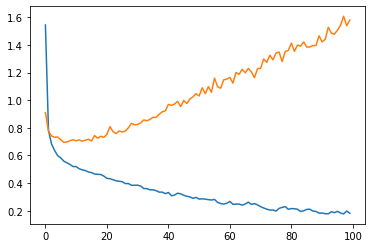

In [133]:
lstm = history.history
import matplotlib.pyplot as plt
plt.plot(lstm['loss'])
plt.plot(lstm['val_loss'])

In [134]:
P = model.predict(X_test)

172/172 [==============================] - 9s 50ms/step


In [135]:
Y_pred = []
for i in range(len(P)):
    if P[i]>=0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)

In [136]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3090
           1       0.98      0.98      0.98      2396

    accuracy                           0.98      5486
   macro avg       0.98      0.98      0.98      5486
weighted avg       0.98      0.98      0.98      5486



In [137]:
confusion_matrix(Y_pred,Y_test)

array([[3053,   37],
       [  55, 2341]], dtype=int64)

In [138]:
accuracy_score(Y_pred,Y_test)

0.983230040102078